In [1]:
# Initialisation

In [2]:
import numpy as np

from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keral i
from sklearn.datasets import make_circles

from sklearn.model_selection import train_test_split

%matplotlib inline

Using TensorFlow backend.


In [3]:
# Helper functions

In [5]:
def plot_data(X, y):
    plt.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
    plt.show()

def plot_decision_boundary_with_data(model, X, y, resolution=50):
    # get data range
    h_min, v_min = X.min(axis=0)
    h_max, v_max = X.max(axis=0)
    
    # subdivide the space and create a matrix of points to draw the prediction contour
    h_points = np.linspace(h_min, h_max, resolution)
    v_points = np.linspace(v_min, v_max, resolution)
    
    h_coords, v_coord = np.meshgrid(h_points, v_points)
    background_points = np.c_[h_coords.ravel(), v_coord.ravel()]
    
    predicted_points = model.predict(background_points)
    Z = predicted_points.reshape(h_coords.shape) # reshape to the range of points, but how?

    # size the image and draw the contour + points
    plt.figure(figsize=(12, 8))
    plt.contourf(h_coords, v_coord, Z, cmap='bwr', alpha=0.3)
    plot_data(X, y)

In [6]:
# Generate sample data and split into train and test sets

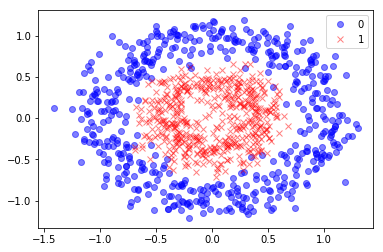

In [19]:
X, y = make_circles(n_samples=1000, noise=0.15, factor=0.4, random_state=123)
plot_data(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [20]:
# Generate a simple 1 layer network identical to the blob_classification

In [28]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.03), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=True)
print(model.evaluate(X_test, y_test))  # Accuracy keeps floating around 60%

Epoch 1/100
750/750 [==============================] - 0s 267us/step - loss: 0.7411 - acc: 0.4827
Epoch 2/100
750/750 [==============================] - 0s 27us/step - loss: 0.7059 - acc: 0.4987
Epoch 3/100
750/750 [==============================] - 0s 31us/step - loss: 0.6975 - acc: 0.5387
Epoch 4/100
750/750 [==============================] - 0s 28us/step - loss: 0.6940 - acc: 0.4533
Epoch 5/100
750/750 [==============================] - 0s 30us/step - loss: 0.6945 - acc: 0.5000
Epoch 6/100
750/750 [==============================] - 0s 33us/step - loss: 0.6947 - acc: 0.5373
Epoch 7/100
750/750 [==============================] - 0s 33us/step - loss: 0.6942 - acc: 0.5507
Epoch 8/100
750/750 [==============================] - 0s 27us/step - loss: 0.6941 - acc: 0.5973
Epoch 9/100
750/750 [==============================] - 0s 30us/step - loss: 0.6942 - acc: 0.5427
Epoch 10/100
750/750 [==============================] - 0s 26us/step - loss: 0.6940 - acc: 0.5160
Epoch 11/100
750/750 [======

750/750 [==============================] - 0s 33us/step - loss: 0.6950 - acc: 0.5920
Epoch 85/100
750/750 [==============================] - 0s 29us/step - loss: 0.6947 - acc: 0.5280
Epoch 86/100
750/750 [==============================] - 0s 31us/step - loss: 0.6934 - acc: 0.5547
Epoch 87/100
750/750 [==============================] - 0s 30us/step - loss: 0.6944 - acc: 0.4240
Epoch 88/100
750/750 [==============================] - 0s 30us/step - loss: 0.6945 - acc: 0.4560
Epoch 89/100
750/750 [==============================] - 0s 27us/step - loss: 0.6940 - acc: 0.5680
Epoch 90/100
750/750 [==============================] - 0s 30us/step - loss: 0.6948 - acc: 0.4880
Epoch 91/100
750/750 [==============================] - 0s 31us/step - loss: 0.6961 - acc: 0.5533
Epoch 92/100
750/750 [==============================] - 0s 27us/step - loss: 0.6933 - acc: 0.5253
Epoch 93/100
750/750 [==============================] - 0s 30us/step - loss: 0.6948 - acc: 0.4640
Epoch 94/100
750/750 [===========

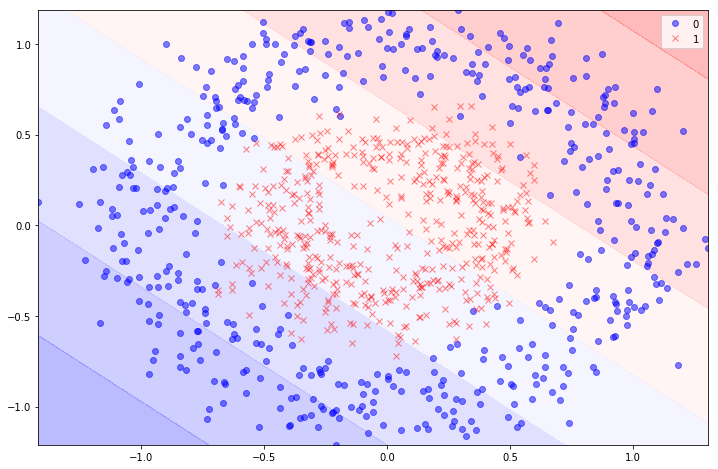

In [25]:
plot_decision_boundary_with_data(model, X, y)  # a single neuron layer is only fittin a linear relation

In [51]:
deep_model = Sequential()
# ~4 is a optimal rule of thumb, but works well with 3 too
model.add(Dense(3, input_shape=(2,), activation="tanh"))  # why tanh works better here?
deep_model.add(Dense(3, activation="tanh"))
deep_model.add(Dense(1, activation="sigmoid"))
deep_model.compile(Adam(lr=0.03), 'binary_crossentropy', metrics=['accuracy'])

deep_model.fit(X_train, y_train, epochs=100, verbose=False)
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


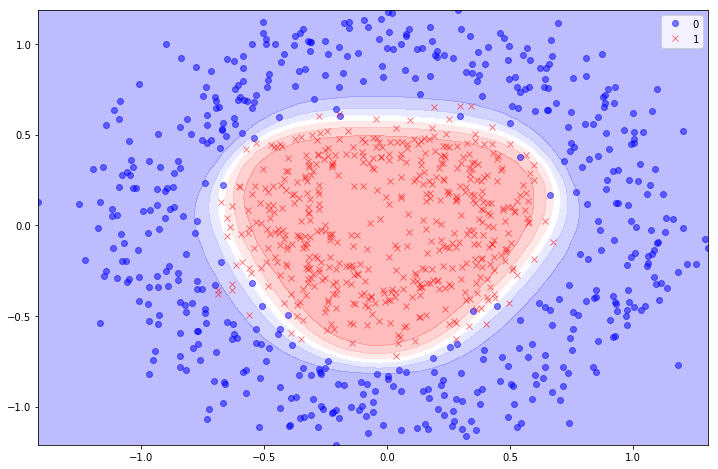

250/250 [==============================] - 0s 674us/step
[0.07202421444654465, 0.976]


In [52]:
plot_decision_boundary_with_data(deep_model, X, y)  # a single neuron layer is only fittin a linear relation
print(deep_model.evaluate(X_test, y_test))  # Accuracy keeps floating around 60%

In [53]:
model.plot_model()

AttributeError: 'Sequential' object has no attribute 'plot_model'